# MVP Análise de Dados e Boas Práticas

**Nome:** Thaysa Santos Mathias de Medeiros Barros

**Matrícula:** 4052025000291

**Dataset:** [Registros de Admissão de Estudantes](https://www.kaggle.com/datasets/zeeshier/student-admission-records)

# Descrição do Problema

---


# Descrição do Problema

O conjunto de dados Registros de Admissão de Estudantes é um conjunto de dados multivariado que simula um sistema de registro de admissão universitária. O objetivo principal é prever se um estudante será admitido.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Estudantes mais velhos apresentam maiores chances de serem admitidos
- Há igualdade em relação ao gênero dos estudantes admitidos
- A pontuação no exame de admissão é um fator determinante na admissão
- Existem uma forte disparidade entre as taxas de aprovações das cidades.

## Tipo de Problema

Este é um problema de **aprendizado supervisionado**, que possui como objetivo identificar se um estudante será admitido na universidade com base características fornecidas.

## Seleção de Dados

Não foi necessária uma etapa de seleção de dados externa. O dataset foi escolhido devido ao seu potencial de tratamento de dados.

## Atributos do Dataset

O dataset contém 157 amostras e possui 7 atributos:

-***Name*** : atributp do tipo categórica, que informa o nome do estudante

-***Age*** : atributo do tipo numérico, que informa a idade do candidato em anos

-***Gender*** : atributo do tipo categórico, que informa o gênero do estudante (Female/Male)

-***Admission Test Score*** : atributo do tipo numérico, que informa a pontuação obtida no exame de admissão

-***High School Percentage*** : atributo do tipo numérico que informa a média percentual do ensino médio

-***City*** : atributo categórico que informa a cidade de residência do candidato

-***Admission Status*** : atributo categórico alvo (Admitted/Rejected)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from kagglehub import KaggleDatasetAdapter
from matplotlib.colors import LinearSegmentedColormap


In [ ]:
# carregamento do dataset
url = "zeeshier/student-admission-records"
file_path = "student_admission_record_dirty.csv"

dataset = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,url,file_path,)

/tmp/ipython-input-107-449724908.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  dataset = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,url,file_path,)


In [ ]:
# dataset guardado no dataframe (df)
df = pd.DataFrame(dataset)

# Análise de Dados

---


Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset possui 157 entradas, sendo 76 classificadas como rejeitadas, 71 classificadas como aceitas e 10 vazias. Além disso, possui 7 atributos, sendo 3 atributos numéricos (float) e 4 atributos categóricos.

In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")

print(df.info())

Total de instâncias: 157

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB
None


In [ ]:
# primeiras linhas
df.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN


As primeiras linhas do dataset demostram a presença de valores faltantes nos campos "High School Percentage" e "Admission Status".

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
print("Estatística descritiva geral dataset:")
df.describe()

Estatística descritiva geral dataset:


,Age,Admission Test Score,High School Percentage
count,147.000000,146.000000,146.000000
mean,19.680272,77.657534,75.684726
std,4.540512,16.855343,17.368014
min,-1.000000,-5.000000,-10.000000
25%,18.000000,68.250000,65.052500
50%,20.000000,79.000000,77.545000
75%,22.000000,89.000000,88.312500
max,24.000000,150.000000,110.500000


## Valores Nulos

In [ ]:
# Presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df.isnull().sum()

Valores nulos no dataset:


,0
Name,10
Age,10
Gender,10
Admission Test Score,11
High School Percentage,11
City,10
Admission Status,10


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
print("Média dos atributos numéricos do dataset:")
df.describe().loc['mean']

Média dos atributos numéricos do dataset:


,mean
Age,19.680272
Admission Test Score,77.657534
High School Percentage,75.684726


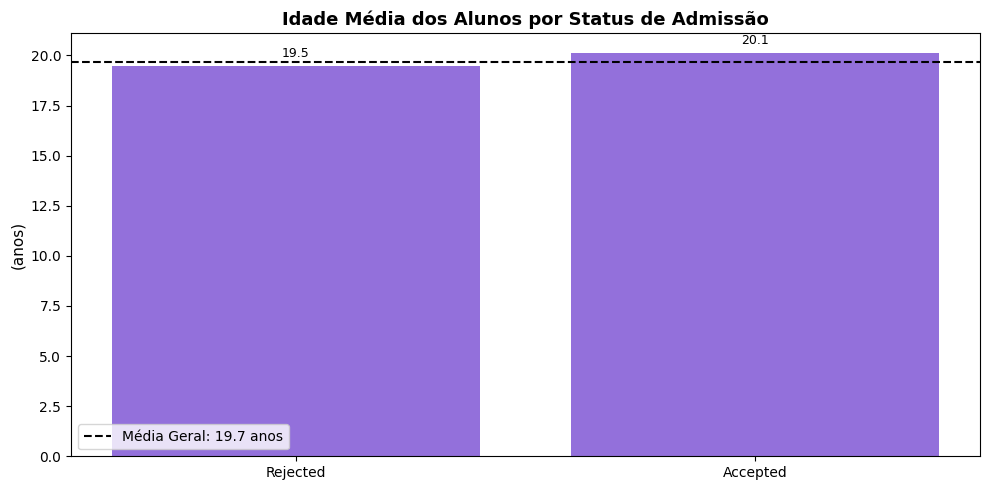

In [ ]:
# Agrupa a média de idade por status de admissão
grouped = df.groupby("Admission Status")["Age"].mean().sort_values()

# Calcula a média geral de idade
media_geral = df["Age"].mean()

# Criação do gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped.index, grouped.values, color="mediumpurple")

# Adiciona linha da média geral
plt.axhline(media_geral, color='black', linestyle='--', linewidth=1.5, label=f"Média Geral: {media_geral:.1f} anos")

# Adiciona os valores no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.3,  # pequeno ajuste de altura
        f'{yval:.1f}',
        ha='center', va='bottom', fontsize=9, color='black'
    )

# Configurações finais
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("(anos)", fontsize=11)
plt.title("Idade Média dos Alunos por Status de Admissão", fontsize=13, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

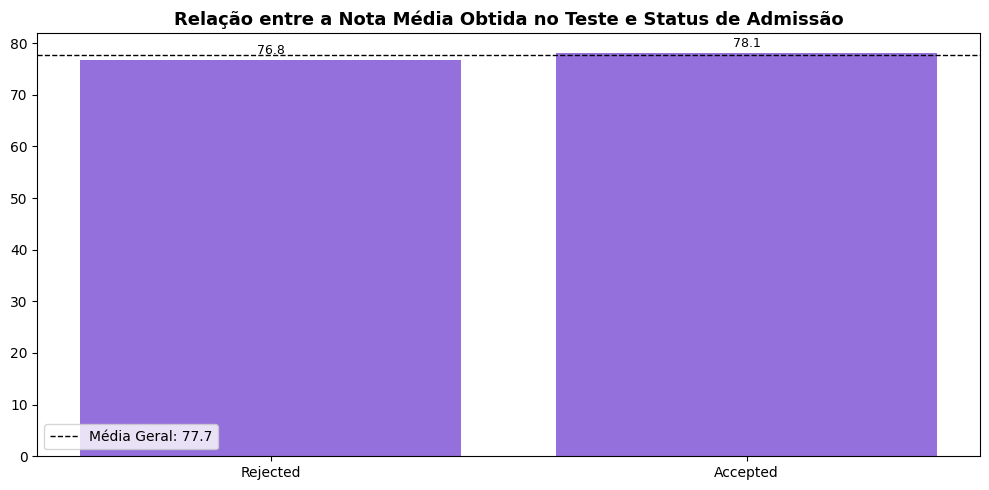

In [ ]:
# Agrupa a média da nota do teste por status de admissão
grouped = df.groupby("Admission Status")["Admission Test Score"].mean().sort_values()

# Calcula a média geral da nota do teste
media_geral = df["Admission Test Score"].mean()

# Criação do gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped.index, grouped.values, color="mediumpurple")

# Adiciona linha da média geral
plt.axhline(media_geral, color='black', linestyle='--', linewidth=1, label=f"Média Geral: {media_geral:.1f}")

# Adiciona os valores no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.5,  # espaço para não colar no topo
        f'{yval:.1f}',
        ha='center', va='bottom', fontsize=9, color='black'
    )

# Configurações finais
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Relação entre a Nota Média Obtida no Teste e Status de Admissão", fontsize=13, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

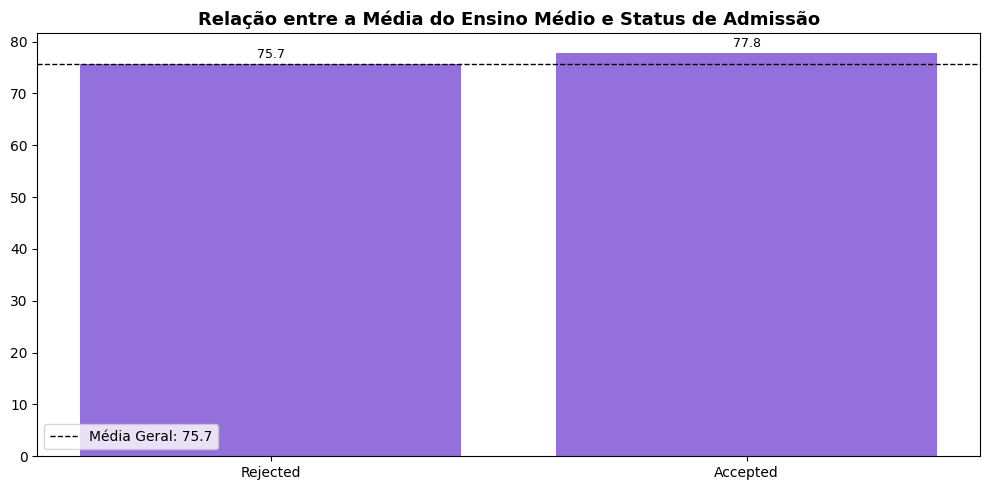

In [ ]:
# Agrupa a média da nota do teste por status de admissão
grouped = df.groupby("Admission Status")["High School Percentage"].mean().sort_values()

# Calcula a média geral da nota do teste
media_geral = df["High School Percentage"].mean()

# Criação do gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped.index, grouped.values, color="mediumpurple")

# Adiciona linha da média geral
plt.axhline(media_geral, color='black', linestyle='--', linewidth=1, label=f"Média Geral: {media_geral:.1f}")

# Adiciona os valores no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.5,  # espaço para não colar no topo
        f'{yval:.1f}',
        ha='center', va='bottom', fontsize=9, color='black'
    )

# Configurações finais
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Relação entre a Média do Ensino Médio e Status de Admissão", fontsize=13, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
print("Desvio Padrão dos atributos numéricos do dataset:")
df.describe().loc['std']

Desvio Padrão dos atributos numéricos do dataset:


,std
Age,4.540512
Admission Test Score,16.855343
High School Percentage,17.368014


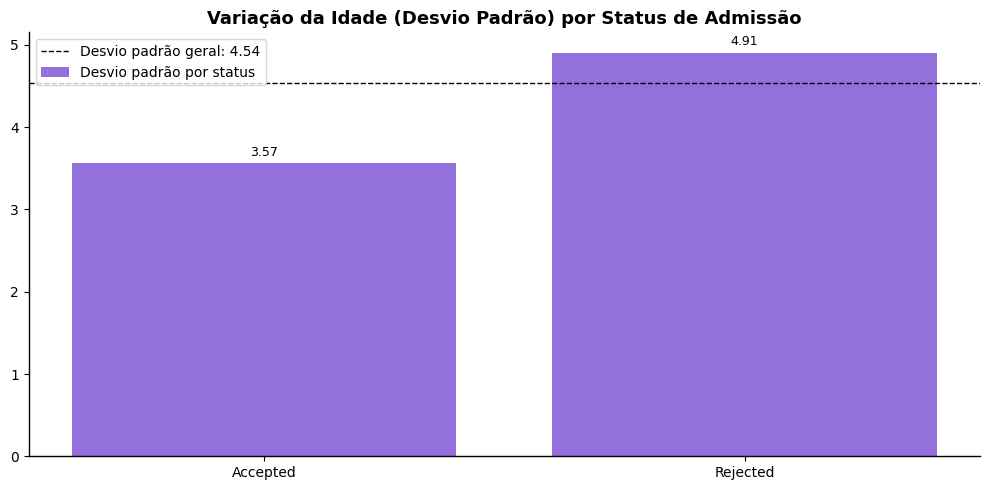

In [ ]:
# Agrupa o desvio padrão da idade por status de admissão
grouped = df.groupby("Admission Status")["Age"].agg(std="std").sort_values("std")

# Calcula o desvio padrão geral
std_geral = df["Age"].std()

# Gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped.index, grouped["std"], color="mediumpurple", label="Desvio padrão por status")

# Linha do desvio padrão geral
plt.axhline(std_geral, color='black', linestyle='--', linewidth=1, label=f"Desvio padrão geral: {std_geral:.2f}")

# Rótulos no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,
        f'{height:.2f}',
        ha='center', va='bottom', fontsize=9
    )

# Estilização final
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Variação da Idade (Desvio Padrão) por Status de Admissão", fontsize=13, weight='bold')

# Manter apenas o frame esquerdo e inferior
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Opcional: reforçar espessura dos spines visíveis
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.legend()
plt.tight_layout()
plt.show()

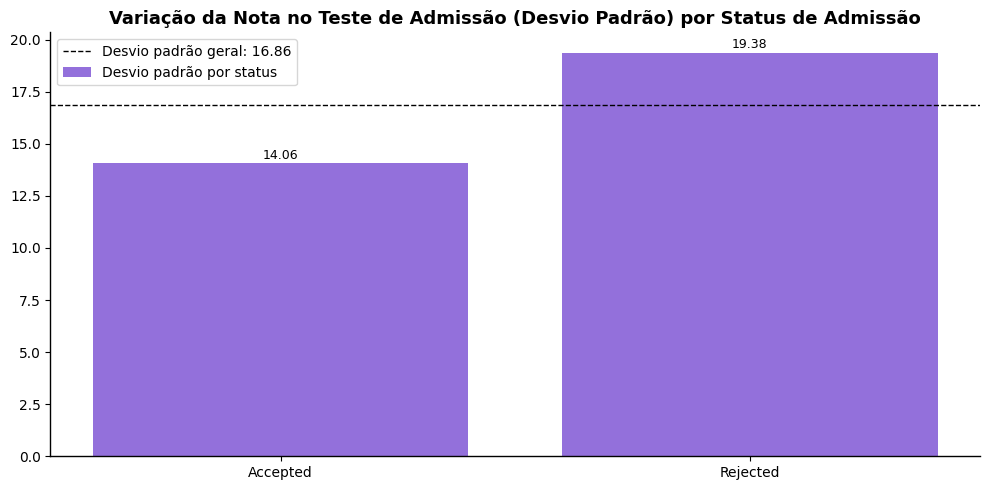

In [ ]:

# Agrupa o desvio padrão da idade por status de admissão
grouped = df.groupby("Admission Status")["Admission Test Score"].agg(std="std").sort_values("std")

# Calcula o desvio padrão geral
std_geral = df["Admission Test Score"].std()

# Gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped.index, grouped["std"], color="mediumpurple", label="Desvio padrão por status")

# Linha do desvio padrão geral
plt.axhline(std_geral, color='black', linestyle='--', linewidth=1, label=f"Desvio padrão geral: {std_geral:.2f}")

# Rótulos no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,
        f'{height:.2f}',
        ha='center', va='bottom', fontsize=9
    )

# Estilização final
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Variação da Nota no Teste de Admissão (Desvio Padrão) por Status de Admissão", fontsize=13, weight='bold')
plt.legend()

# Manter apenas o frame esquerdo e inferior
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Opcional: reforçar espessura dos spines visíveis
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

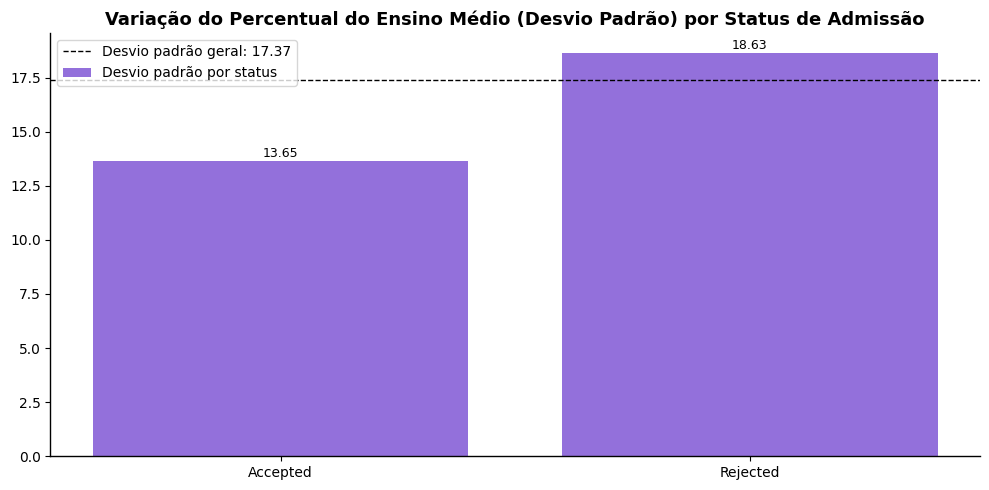

In [ ]:
# Agrupa o desvio padrão da idade por status de admissão
grouped = df.groupby("Admission Status")["High School Percentage"].agg(std="std").sort_values("std")

# Calcula o desvio padrão geral
std_geral = df["High School Percentage"].std()

# Gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped.index, grouped["std"], color="mediumpurple", label="Desvio padrão por status")

# Linha do desvio padrão geral
plt.axhline(std_geral, color='black', linestyle='--', linewidth=1, label=f"Desvio padrão geral: {std_geral:.2f}")

# Rótulos no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,
        f'{height:.2f}',
        ha='center', va='bottom', fontsize=9
    )

# Estilização final
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Variação do Percentual do Ensino Médio (Desvio Padrão) por Status de Admissão", fontsize=13, weight='bold')
plt.legend()

# Manter apenas o frame esquerdo e inferior
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Opcional: reforçar espessura dos spines visíveis
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *Idade*


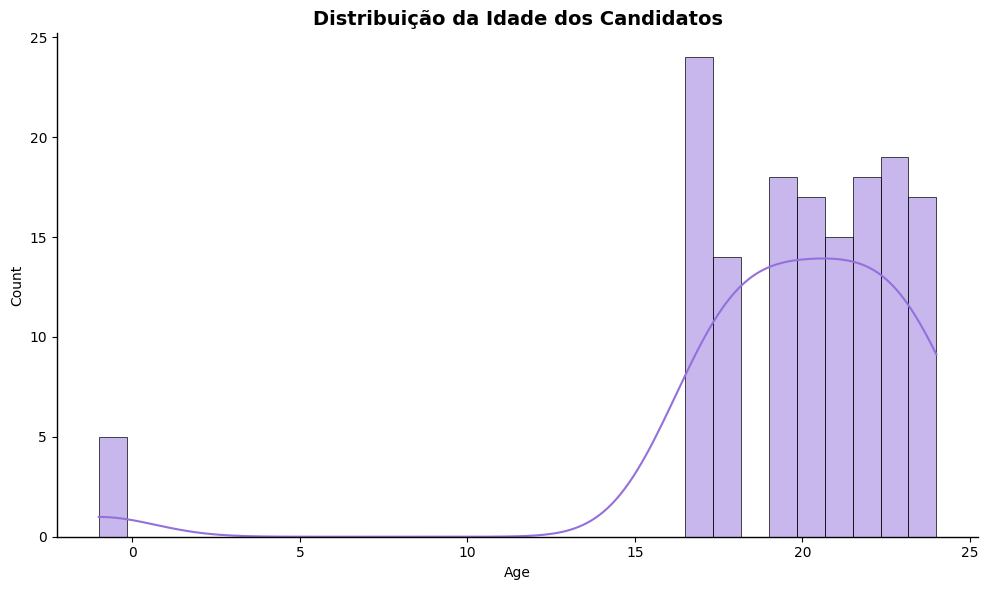

In [ ]:
plt.figure(figsize=(10, 6))

# Histograma com curva KDE e bordas nas barras
sns.histplot(
    data=df,
    x='Age',
    bins=30,
    kde=True,
    color='mediumpurple',
    edgecolor='black',
    linewidth=0.5
)

# Estilização sem grade
plt.title('Distribuição da Idade dos Candidatos', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Manter apenas o frame esquerdo e inferior
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Opcional: reforçar espessura dos spines visíveis
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

- O histograma mostra a presença de candidatos com idade 0 ou muito baixa, o que pode indicar dados inválidos que precisam ser tratados.

- A distribuição está concentrada nas idade entre 17 e 24 anos, o que condiz com processos seletivos universitários.

### *Nota no Teste de Admissão*

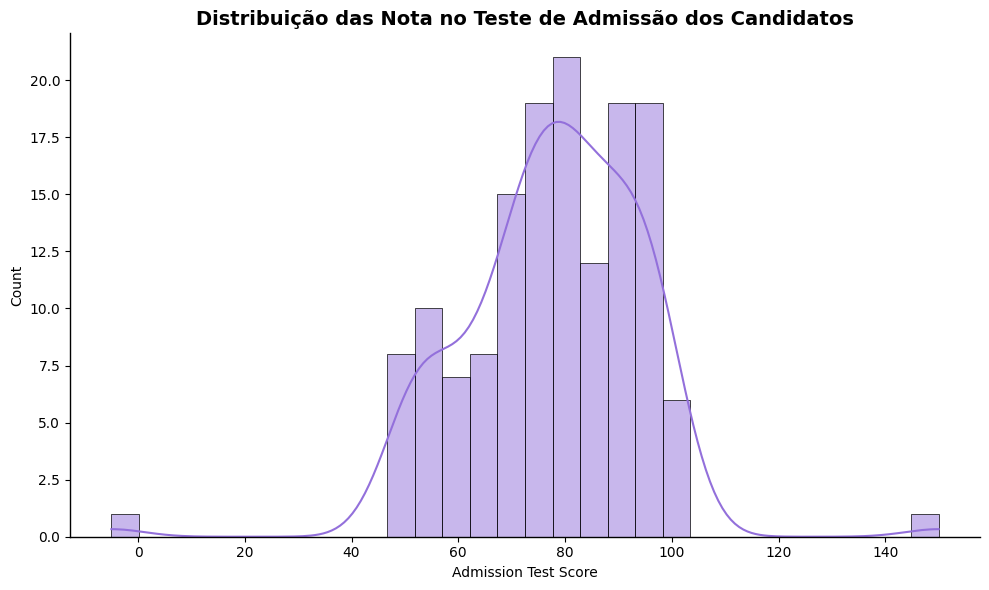

In [ ]:
plt.figure(figsize=(10, 6))

# Histograma com curva KDE e bordas nas barras
sns.histplot(
    data=df,
    x='Admission Test Score',
    bins=30,
    kde=True,
    color='mediumpurple',
    edgecolor='black',
    linewidth=0.5
)

# Estilização sem grade
plt.title('Distribuição das Nota no Teste de Admissão dos Candidatos', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Manter apenas o frame esquerdo e inferior
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Opcional: reforçar espessura dos spines visíveis
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

- O histograma mostra a presença de notas próximas de 0 ou negativas, o que pode indicar dados inválidos que precisam ser tratados.

- O histograma mostra a presença de notas maiores que 100, o que pode indicar dados inválidos que precisam ser tratados.

- O histograma apresenta uma distribuição aproximadamente normal, com picos de valores entre as faixas 80 e 100.

- O histograma indica que a maior parte dos candidatos tem notas elevadas no teste de admissão, o que pode refletir um perfil competitivo

### *Média Percentual Obtida no Ensino Médio*

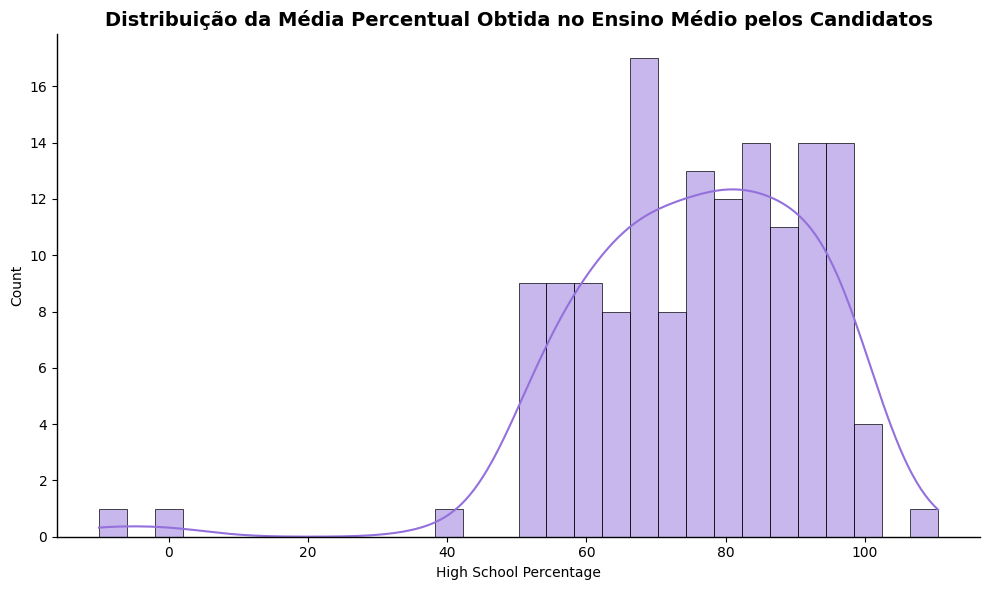

In [ ]:
plt.figure(figsize=(10, 6))

# Histograma com curva KDE e bordas nas barras
sns.histplot(
    data=df,
    x='High School Percentage',
    bins=30,
    kde=True,
    color='mediumpurple',
    edgecolor='black',
    linewidth=0.5
)

# Estilização sem grade
plt.title('Distribuição da Média Percentual Obtida no Ensino Médio pelos Candidatos', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Manter apenas o frame esquerdo e inferior
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Opcional: reforçar espessura dos spines visíveis
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

- O gráfico apresenta valores menores do que zero e maiores do que 100, o que pode indicar uma inconsistência nos dados fornecidos.


- A maioria dos candidatos está concentrada na faixa entre 50 e 100, com picos entre 70 a 90%.

- O gráfico indica que a maior parte dos candidatos tem médias elevadas no ensino médio, o que pode refletir um perfil competitivo.

- Observa-se uma distribuição unimodal, levemente assimétrica.

## Gráfico de Barras

### *Gênero*


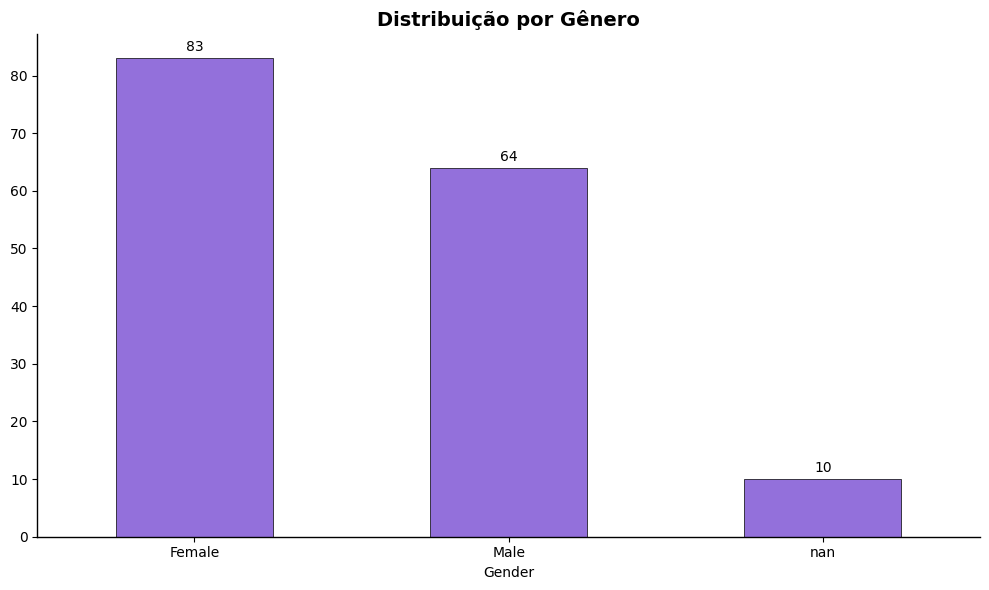

In [ ]:
plt.figure(figsize=(10, 6))

ax = df['Gender'].value_counts(dropna=False).plot(
    kind='bar',
    color='mediumpurple',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Distribuição por Gênero', fontsize=14, weight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Remover grade
plt.grid(False)

# Adicionando rótulos acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{int(height)}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 3),
        textcoords='offset points'
    )
# Mantém apenas o frame esquerdo e inferior (oculta os outros dois)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ajusta a espessura e cor das bordas visíveis para melhor estética
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

- 53% dos candidatos são mulheres, 41% dos candidatos são homens e 6% de dados ausentes.

- A distribuição é levemente assimétrica entre os gêneros, mas nao há necessidade de balancear.

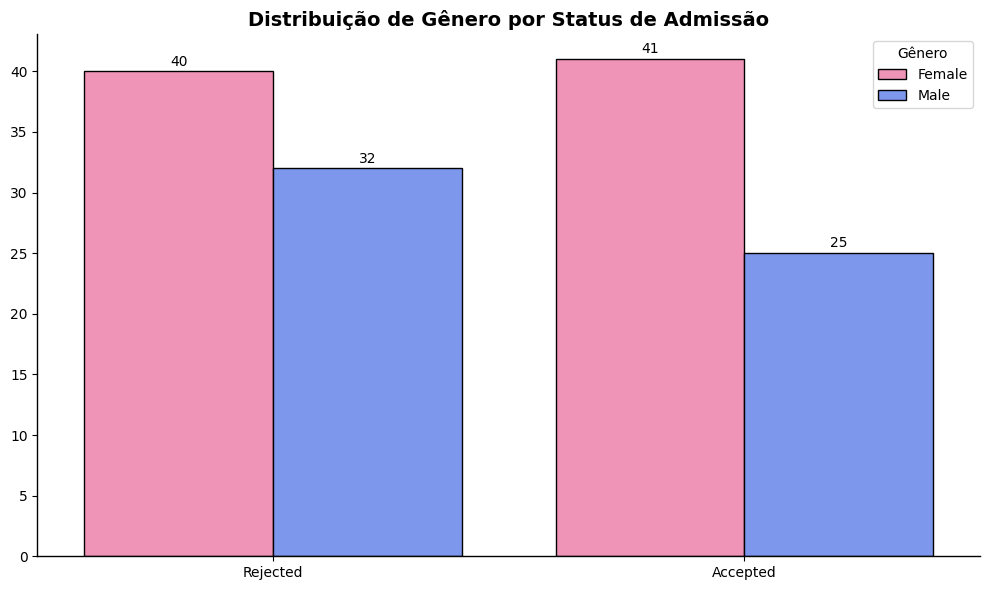

In [ ]:
# Paleta
custom_palette = {
    'Male': '#6A8DFF',     # Azul suave
    'Female': '#FF85B3'    # Rosa suave
}

plt.figure(figsize=(10, 6))

# Gráfico de contagem com cores personalizadas
ax = sns.countplot(
    x='Admission Status',
    hue='Gender',
    data=df,
    palette=custom_palette,
    edgecolor='black'
)

# Remove os nomes dos eixos
ax.set_xlabel('')
ax.set_ylabel('')

# Adiciona os rótulos de contagem no topo das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

# Título e legenda
plt.title('Distribuição de Gênero por Status de Admissão', fontsize=14, fontweight='bold')
plt.legend(title='Gênero')

# Mantém apenas o frame esquerdo e inferior (oculta os outros dois)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ajusta a espessura e cor das bordas visíveis para melhor estética
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

- 62% dos aceitos são mulheres e 38% dos aceitos são homens.

- 55% dos rejeitados são mulheres e 45% dos rejeitados são homens.

- 56% dos homens foram rejeitados e 49% das mulheres foram rejeitadas.

- 43% dos homens foram aceitos e 51% das mulheres foram aceitas.

- Devido ao maior números de mulheres, elas são a maioria nas duas classificações. Entretanto, observa-se que dentro do mesmo gênero, as muheres apresentam um percentual maior de aceitação e os homens apresentam um percentual maior de rejeição.

### *Cidade*

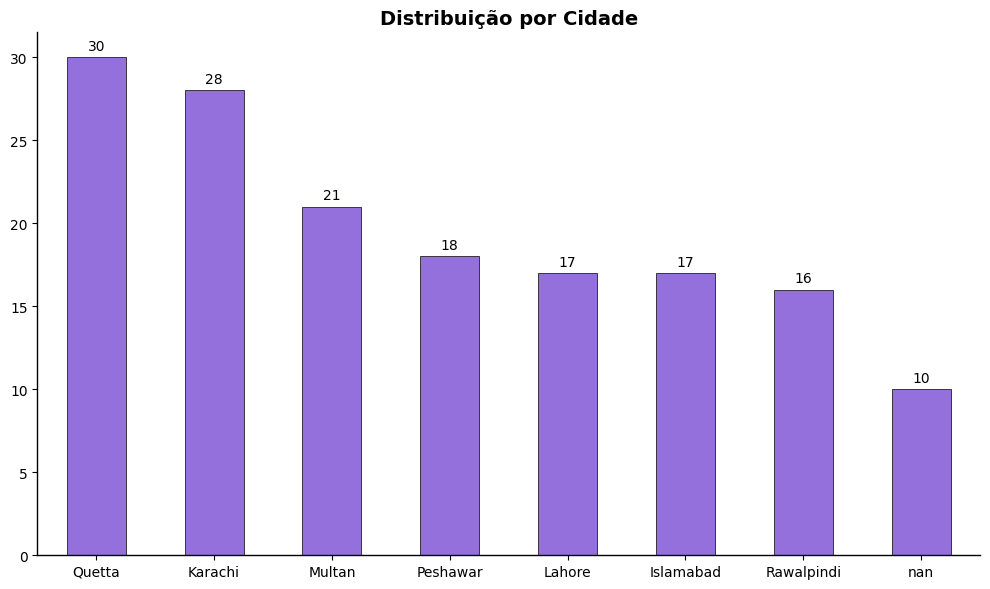

In [ ]:
plt.figure(figsize=(10, 6))

ax = df['City'].value_counts(dropna=False).plot(
    kind='bar',
    color='mediumpurple',
    edgecolor='black',
    linewidth=0.5
)
# Remove os nomes dos eixos
ax.set_xlabel('')
ax.set_ylabel('')

plt.title('Distribuição por Cidade', fontsize=14, weight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Remover grade
plt.grid(False)

# Adicionando rótulos acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{int(height)}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 3),
        textcoords='offset points'
    )
# Mantém apenas o frame esquerdo e inferior (oculta os outros dois)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ajusta a espessura e cor das bordas visíveis para melhor estética
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

- 6% dos dados não foram informados.

- As cidades de Quetta, Karachi  e Multan representam 50% da origem do número total de candidatos.

/tmp/ipython-input-127-1416702914.py:13: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


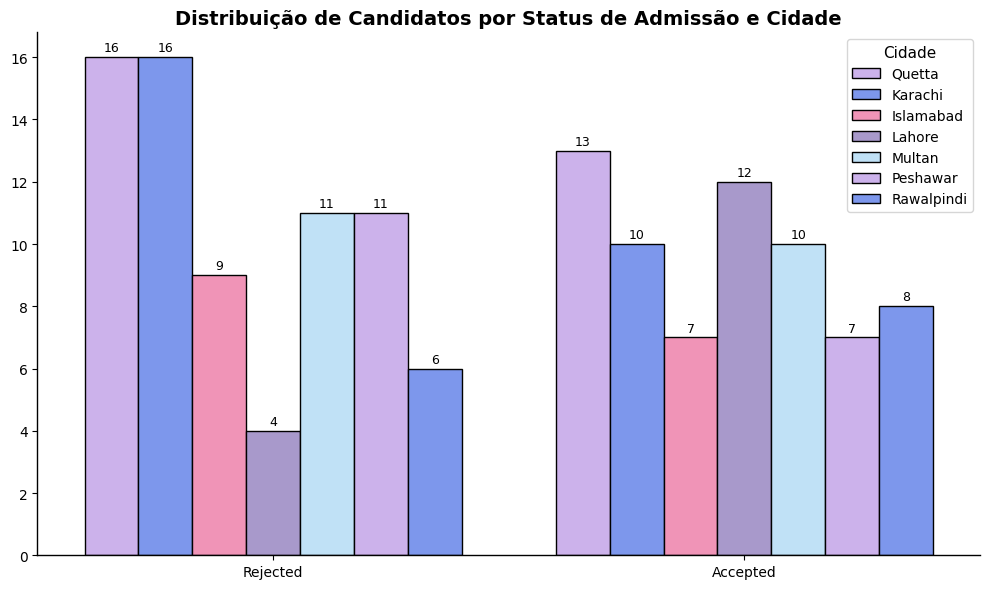

In [ ]:
# Paleta
custom_palette = [
    '#CBA8F5',  # Lilás claro
    '#6A8DFF',  # Azul suave
    '#FF85B3',  # Rosa suave
    '#A491D3',  # Roxo lavanda
    '#B7E3FF'   # Azul bebê
]

plt.figure(figsize=(10, 6))

# Gráfico de contagem com borda nas barras
ax = sns.countplot(
    x='Admission Status',
    hue='City',
    data=df,
    palette=custom_palette,
    edgecolor='black'
)

# Remove os nomes dos eixos
ax.set_xlabel('')
ax.set_ylabel('')

# Adiciona rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

# Título e legenda
plt.title('Distribuição de Candidatos por Status de Admissão e Cidade', fontsize=14, fontweight='bold')

plt.legend(title='Cidade', fontsize=10, title_fontsize=11)

# Mantém apenas o frame esquerdo e inferior (oculta os outros dois)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ajusta a espessura e cor das bordas visíveis para melhor estética
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

- Quetta e Karachi apresentam as maiores taxas de rejeição, cada um com 22% do total de rejeitados.

- Quetta e Lahore apresentam as maiores tavas de aceitação, sendo Quetta com 19% e Lahore com 18% do total de aceitos.

- 75% dos candidatos da cidade de Lahore são aceitos.

- 57% dos candidatos da cidade de Rawalpindi são aceitos.

- 48% dos candidatos da cidade de Multan são aceitos.

- 45% dos candidatos da cidade de Quetta são aceitos.

- 44% dos candidatos da cidade de Islamabad são aceitos.

- 39% dos candidatos da cidade de Peshawar são aceitos.

- 38% dos candidatos da cidade de Karachi são aceitos.

- Karachi é a cidade com a maior taxa de rejeitados e Lahore é a cidade com a maior taxa de aceitos.

Verificar Possível Desbalanceamento de Classes

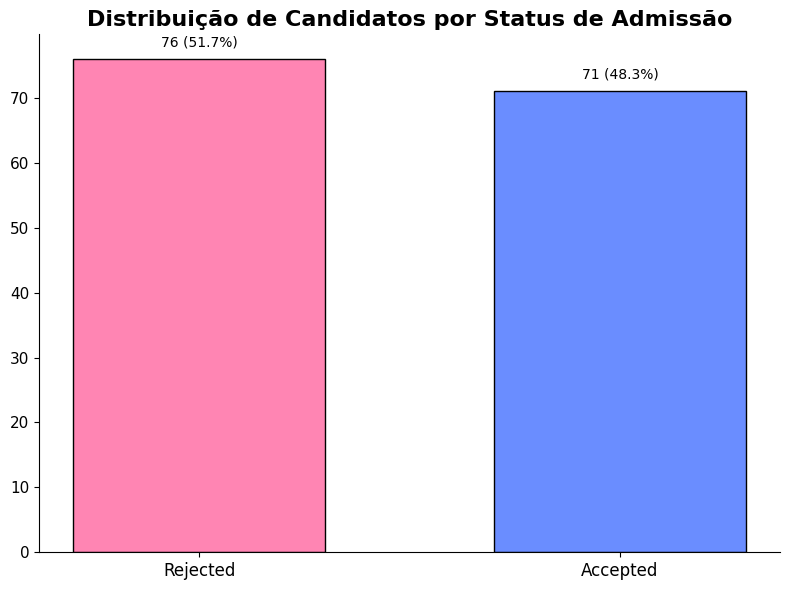

In [ ]:

# Contagem das classes
class_counts = dataset['Admission Status'].value_counts()
total = class_counts.sum()

# Cores personalizadas
cores = ['#6A8DFF', '#FF85B3'] if class_counts.index[0] == 'Accepted' else ['#FF85B3', '#6A8DFF']

# Criar figura
plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=cores, edgecolor='black', width=0.6)

# Título apenas
plt.title('Distribuição de Candidatos por Status de Admissão', fontsize=16, weight='bold')

# Remove nomes dos eixos
plt.xlabel('')
plt.ylabel('')

# Ajusta os ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

# Remove bordas supérfluas
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Rótulos acima das barras
for bar in bars:
    height = bar.get_height()
    percent = height / total * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + total*0.01,
             f'{int(height)} ({percent:.1f}%)',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- Há um leve desbalanceamento entre as classes, mas há necessidade de realizar procedimentos de correção, dado que a classe predominante não é maior ou igual a 60% do dataset.

## Boxplot



In [ ]:
# Estatísticas descritivas agrupadas por Status de Admissão
stats = df.groupby('Admission Status').describe()

stats.style\
    .set_caption("Estatísticas Descritivas por Status de Admissão")\
    .format("{:.2f}")

### Idade


/tmp/ipython-input-130-611635470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


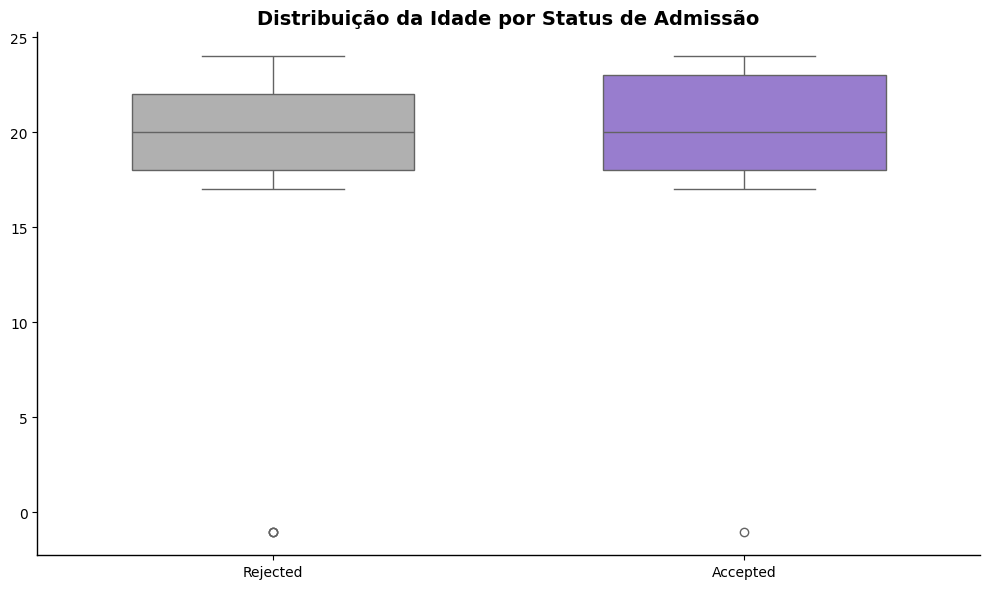

In [ ]:
# Boxplot idade por status de admissão
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Admission Status',
    y='Age',
    data=df,
    palette=['#B0B0B0', 'mediumpurple'],
    width=0.6,
    linewidth=1
)

# Título e rótulos ajustados
plt.title('Distribuição da Idade por Status de Admissão', fontsize=14, weight='bold')

# Remove os nomes dos eixos
plt.xlabel('')
plt.ylabel('')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remoção de grid e bordas superiores/direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

- Existem valores abaixo de 0, o que indica inconsistência dos dados.

- Para ambos os status de admissão a mediana é muito próxima e em torno de 20 anos.

- Sobre o intervalo interquartil, as faixas entre Q1 e Q3 estão entre 18 e 24 anos para ambos os status.

- A idade não se mostra um fator decisivo para admissão.

/tmp/ipython-input-131-1840350364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


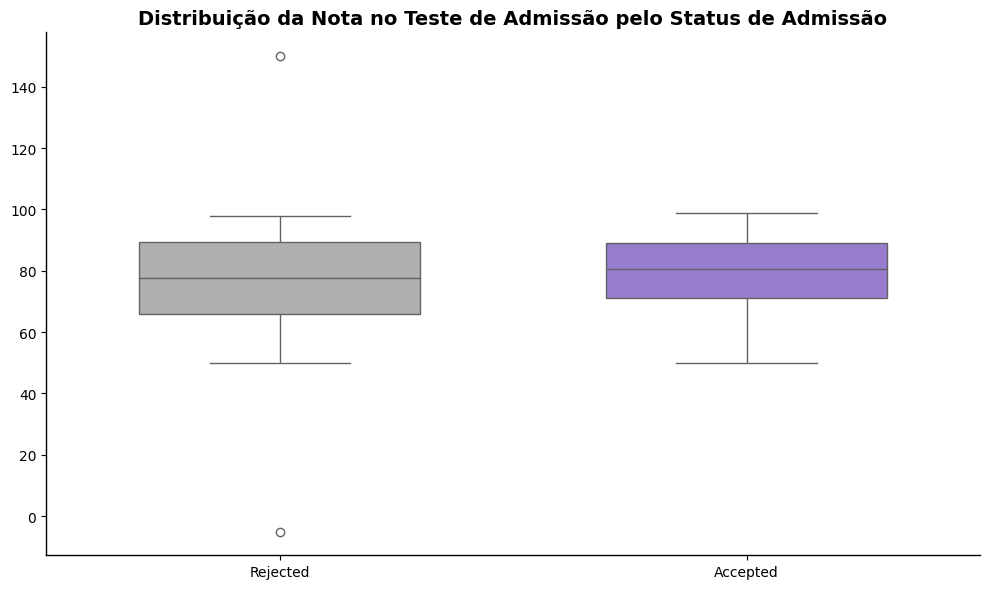

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Admission Status',
    y='Admission Test Score',
    data=df,
    palette=['#B0B0B0', 'mediumpurple'],
    width=0.6,
    linewidth=1
)

# Título e rótulos ajustados
plt.title('Distribuição da Nota no Teste de Admissão pelo Status de Admissão', fontsize=14, weight='bold')

# Remove os nomes dos eixos
plt.xlabel('')
plt.ylabel('')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remoção de grid e bordas superiores/direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

- Existem valores abaixo de 0 e acima de 100 referentes ao status rejeitado, o que indica uma inconsistência dos dados.

- Para ambos os status de admissão, a mediana das notas no teste de admissão é semelhante e estão entre 75 e 85.

- O status rejeitado apresenta uma maior variabilidade das notas, indicado pelo intervalo interquartil maior e presença de outliers nos dois extremos.

- O status aceito apresenta uma dispersão menor.

- Esse é um critéio que influencia, mas não é difinitivo para definição do status de admissão, dado que notas altas não indicam necessáriamente aceitação.

/tmp/ipython-input-132-3597033358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


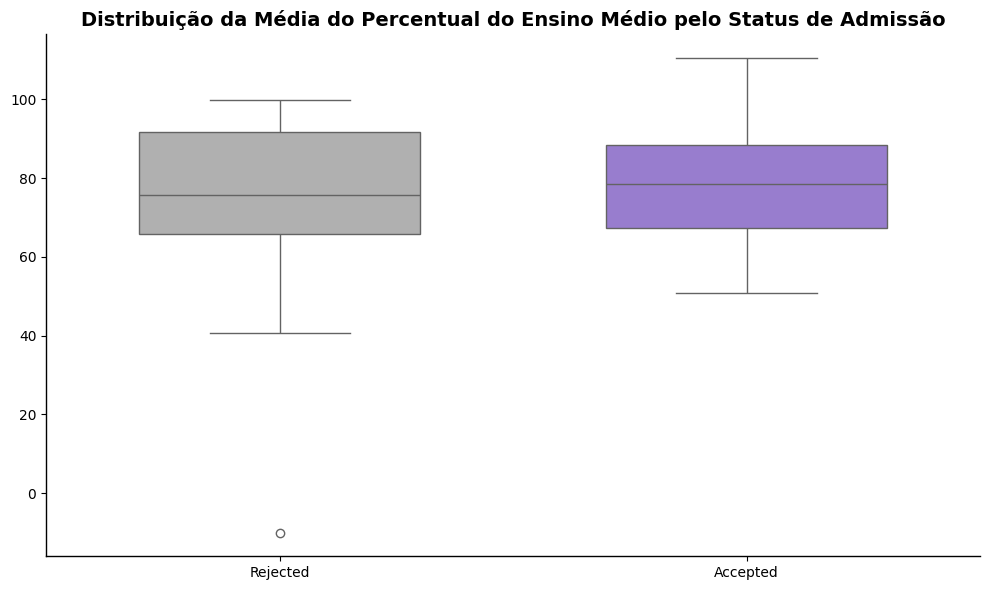

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Admission Status',
    y='High School Percentage',
    data=df,
    palette=['#B0B0B0', 'mediumpurple'],
    width=0.6,
    linewidth=1
)

# Título e rótulos ajustados
plt.title('Distribuição da Média do Percentual do Ensino Médio pelo Status de Admissão', fontsize=14, weight='bold')

# Remove os nomes dos eixos
plt.xlabel('')
plt.ylabel('')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remoção de grid e bordas superiores/direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

- Para ambos os status de admissão, a mediana está entre 75 e 80.

- Observa-se um valor negativo no status rejeitado, o que indica uma inconsistência dos dados.

- Observa-se valores maiores que 100 no status aceito, o que indica inconsistência dos dados.

- O status rejeitado apresenta uma faixa de valores mais extensa (entre 40 e 100)

- Esse é um critéio que influencia, mas não é difinitivo para definição do status de admissão, dado que valores elevados não indicam aceitação.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:,[1,3,4]].corr()


Matriz de Correlação:


,Age,Admission Test Score,High School Percentage
Age,1.000000,0.008658,0.170515
Admission Test Score,0.008658,1.000000,-0.126900
High School Percentage,0.170515,-0.126900,1.000000


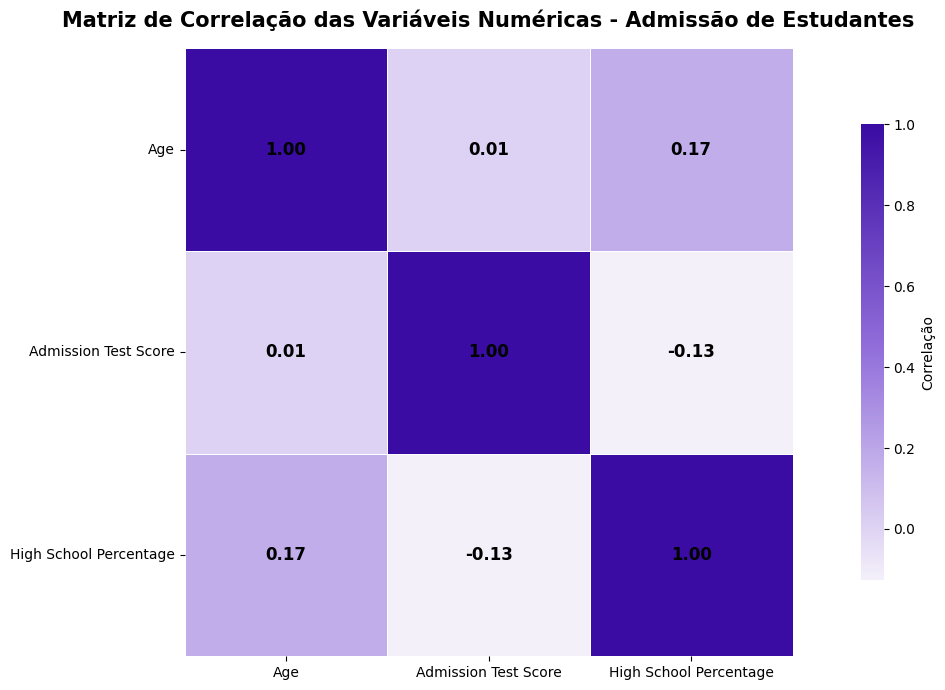

In [ ]:
# Paleta personalizada
colors = ["#f4f0fa", "mediumpurple", "#3a0ca3"]
cmap_roxo = LinearSegmentedColormap.from_list("mediumpurple_shift", colors)

# Figura
plt.figure(figsize=(14, 7))

# Heatmap com melhorias visuais
sns.heatmap(
    df.iloc[:, [1, 3, 4]].corr(),
    annot=True,
    cmap=cmap_roxo,
    fmt=".2f",
    linewidths=0.6,
    linecolor='white',
    cbar_kws={"shrink": 0.75, "label": "Correlação"},
    square=True,
    annot_kws={"size": 12, "weight": "bold", "color": "black"},
    mask=df.iloc[:, [1, 3, 4]].corr().isnull()
)

# Título estilizado
plt.title(
    'Matriz de Correlação das Variáveis Numéricas - Admissão de Estudantes',
    fontsize=15, fontweight='bold', pad=15
)

# Ajustes nos eixos
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(rotation=0, fontsize=10)


# Layout final
plt.tight_layout()
plt.show()

- Não há correlação linear entre as variáveis idade e nota do teste de admissão.

- Baixa correlação positiva entre as variáveis idade e percentual do ensino médio.

- Baixa correlação negativa entre as variáveis nota de admissão e percentual do ensino médio.

- Existe uma correlação fraca ou nenhuma correlação linear entre as variavéis, o que indica que apresentam informações independêntes.

# Pré-Processamento de Dados

---

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## Tratamento de Valores Inconsistentes

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
#Duplicar dataset para manter o original
df_alterado = df.copy()

In [ ]:
# Retirar valores inconsistentes (negativos e maiores que 100)
df_alterado = df_alterado[df_alterado['Age'] >= 15]

df_alterado = df_alterado[(df_alterado['Admission Test Score'] >= 0) & (df_alterado['Admission Test Score'] <= 100 )]

df_alterado = df_alterado[(df_alterado['High School Percentage'] >= 0) & (df_alterado['High School Percentage'] <= 100 )]

# subtituição de valores nulos pela média

df_alterado['Admission Test Score'] = df_alterado['Admission Test Score'].fillna(df_alterado['Admission Test Score'].median())

df_alterado['High School Percentage'] = df_alterado['High School Percentage'].fillna(df_alterado['High School Percentage'].median())

df_alterado['Age'] = df_alterado['Age'].fillna(df_alterado['Age'].median())

# retirada de valores nulos da coluna status de admissão
df_alterado = df_alterado.dropna(subset=['Admission Status'])

#substituição de valores nulos da coluna cidade pela moda
df_alterado['City'] = df_alterado['City'].fillna(df_alterado['City'].mode()[0])

#substituição de valores nulos das colunas nome e gênero por "não informado"
df_alterado[['Name', 'Gender']] = df_alterado[['Name', 'Gender']].fillna('Não informado')

df_alterado.isnull().sum()

# retirar entradas duplicadas
df_alterado = df_alterado.drop_duplicates()
df_alterado.info()



<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    105 non-null    object 
 1   Age                     105 non-null    float64
 2   Gender                  105 non-null    object 
 3   Admission Test Score    105 non-null    float64
 4   High School Percentage  105 non-null    float64
 5   City                    105 non-null    object 
 6   Admission Status        105 non-null    object 
dtypes: float64(3), object(4)
memory usage: 6.6+ KB


## Padronização

In [ ]:
scaler = StandardScaler()

#transformação da variável idade
df_alterado["idade_padronizada"] = scaler.fit_transform(df_alterado[['Age']])

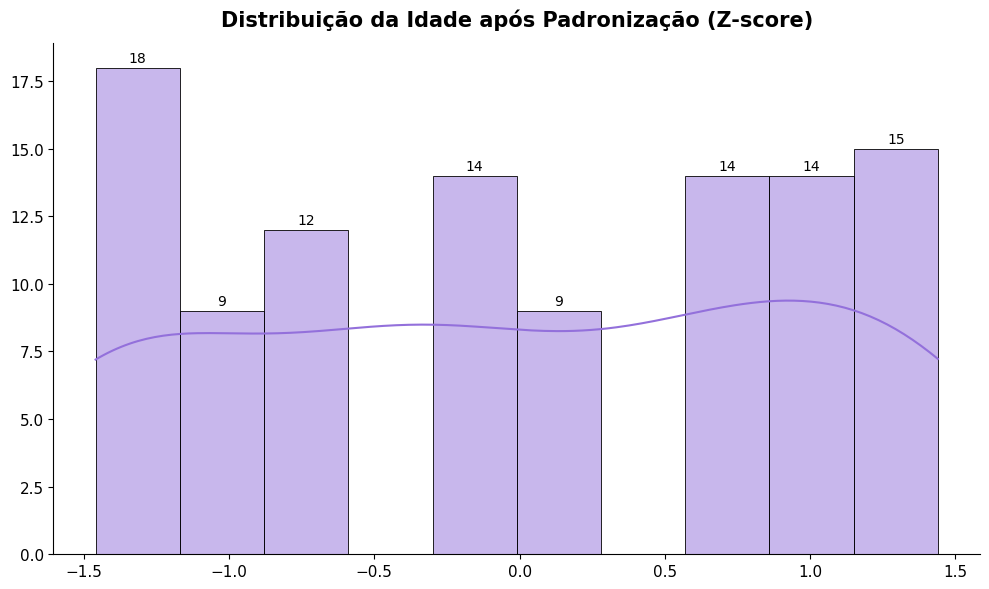

In [ ]:
plt.figure(figsize=(10, 6))

# Criação do histograma
ax = sns.histplot(
    df_alterado["idade_padronizada"],
    kde=True,
    bins=10,
    color='mediumpurple',
    edgecolor='black',
    linewidth=0.6
)

# Adiciona labels em cada barra
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,  # centro da barra
            height + 0.1,                            # um pouco acima do topo
            f'{int(height)}',                        # valor inteiro
            ha='center', va='bottom', fontsize=10
        )

# Título estilizado
plt.title('Distribuição da Idade após Padronização (Z-score)', fontsize=15, fontweight='bold', pad=12)

# Remove nomes dos eixos
plt.xlabel('')
plt.ylabel('')

# Remove grid e bordas
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ticks uniformes
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


- Foi escolhida a padronização Z-score scaling para a variável idade devido a distribuição próxima da normal dos dados.

## Normalização

In [ ]:
scaler2 = MinMaxScaler()

#Transformação da variavel Nota no teste de admissão
df_alterado['nota_padronizada'] = scaler2.fit_transform(df_alterado[['Admission Test Score']])

#Transformação da variavel Média do percentual do ensino medio
df_alterado['ensinomedio_padronizado'] = scaler2.fit_transform(df_alterado[['High School Percentage']])

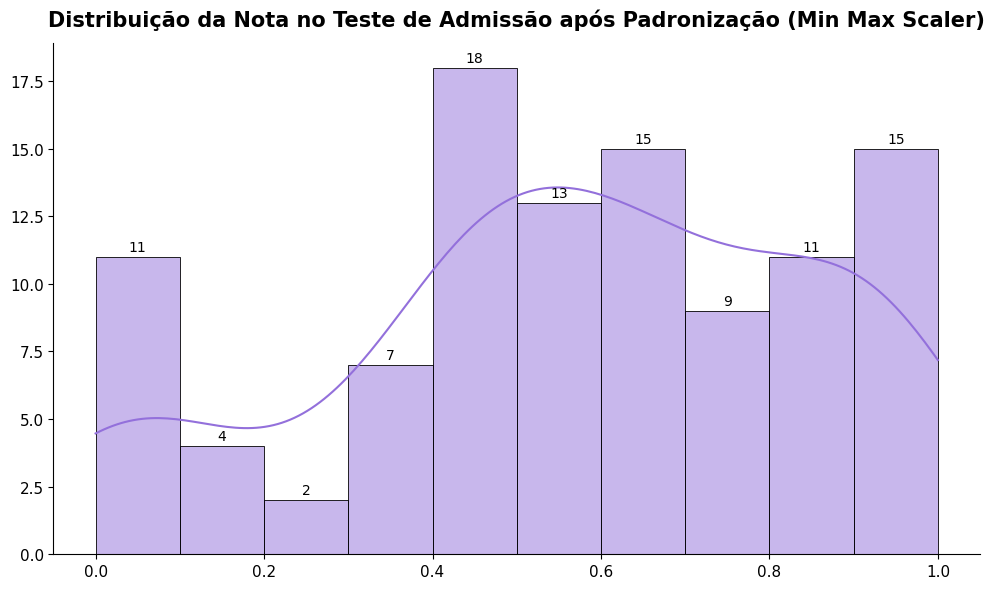

In [ ]:
plt.figure(figsize=(10, 6))

# Criação do histograma
ax = sns.histplot(
    df_alterado['nota_padronizada'],
    kde=True,
    bins=10,
    color='mediumpurple',
    edgecolor='black',
    linewidth=0.6
)

# Adiciona labels em cada barra
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,  # centro da barra
            height + 0.1,                            # um pouco acima do topo
            f'{int(height)}',                        # valor inteiro
            ha='center', va='bottom', fontsize=10
        )

# Título estilizado
plt.title('Distribuição da Nota no Teste de Admissão após Padronização (Min Max Scaler)', fontsize=15, fontweight='bold', pad=12)

# Remove nomes dos eixos
plt.xlabel('')
plt.ylabel('')

# Remove grid e bordas
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ticks uniformes
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


- Após a limpeza dos dados, foi escolhida a padronização MinMax Scaler, uma vez que a variável Nota no Teste de Admissão tem um intervalo natural (entre 0 e 100) e a maior parte dos dados está concentrada numa faixa média e alta.

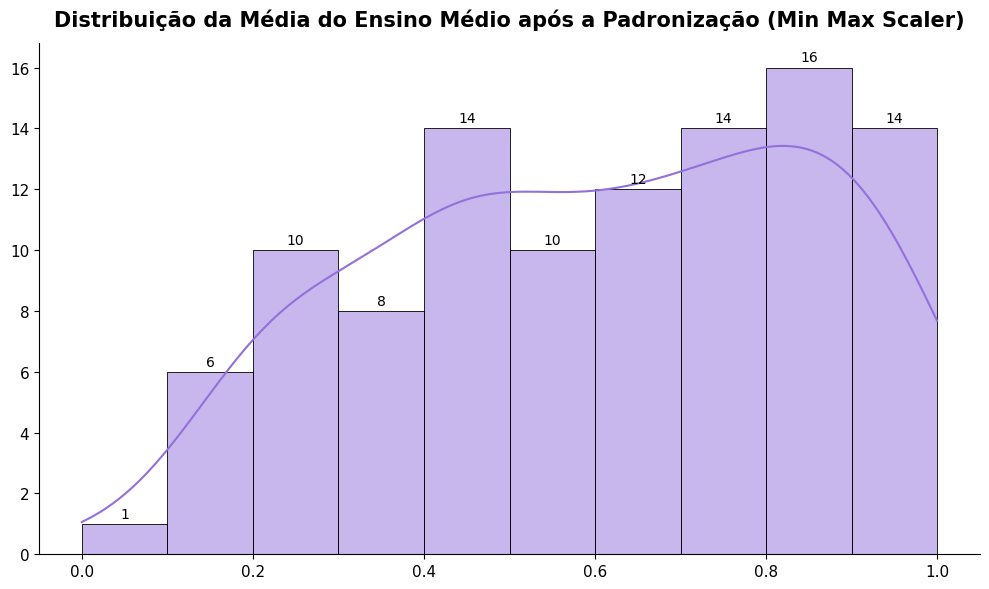

In [ ]:
plt.figure(figsize=(10, 6))

# Criação do histograma
ax = sns.histplot(
    df_alterado['ensinomedio_padronizado'],
    kde=True,
    bins=10,
    color='mediumpurple',
    edgecolor='black',
    linewidth=0.6
)

# Adiciona labels em cada barra
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,  # centro da barra
            height + 0.1,                            # um pouco acima do topo
            f'{int(height)}',                        # valor inteiro
            ha='center', va='bottom', fontsize=10
        )

# Título estilizado
plt.title('Distribuição da Média do Ensino Médio após a Padronização (Min Max Scaler)', fontsize=15, fontweight='bold', pad=12)

# Remove nomes dos eixos
plt.xlabel('')
plt.ylabel('')

# Remove grid e bordas
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ticks uniformes
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


Foi escolhida a padronização MinMax Scaler, uma vez que a variável Média do Ensino Médio tem um intervalo natural (entre 0 e 100) e a maior parte dos dados está concentrada numa faixa alta.

## Label Encoding

In [ ]:
le = LabelEncoder()

#Transformação da variável nome
df_alterado['nome_alterado'] = le.fit_transform(df_alterado['Name'])

#Transformação da variável gênero
df_alterado['genero_alterado'] = le.fit_transform(df_alterado['Gender'])

#Transformação da variável cidade
df_alterado['cidade_alterado'] = le.fit_transform(df_alterado['City'])

#Transformação da variável status de admissão
df_alterado['status_alterado'] = le.fit_transform(df_alterado['Admission Status'])

#Manter apenas as colunas transformadas
df_transformado = df_alterado.copy()

df_transformado = df_transformado.drop(['Name', 'Age', "Gender", "Admission Test Score", "High School Percentage", "City", "Admission Status"], axis=1)

df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade_padronizada        105 non-null    float64
 1   nota_padronizada         105 non-null    float64
 2   ensinomedio_padronizado  105 non-null    float64
 3   nome_alterado            105 non-null    int64  
 4   genero_alterado          105 non-null    int64  
 5   cidade_alterado          105 non-null    int64  
 6   status_alterado          105 non-null    int64  
 7   genero_str               105 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Separar features (X) e target (y)
X = df_transformado.drop('status_alterado', axis=1)
y = df_transformado['status_alterado']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (73, 7)
Dimensões de X_test: (32, 7)
Dimensões de y_train: (73,)
Dimensões de y_test: (32,)


# Conclusão

A análise e pré-processamento do dataset demonstram a importância de entender a estrutura dos dados antes da modelagem.

Para a limpeza do dataset foram identificados e tratados valores faltantes e inconsistentes por meio da exclusão de linhas e preenchimento com a média, moda e criação da categoria "não informado" em variáveis importantes como idade, nota e status de admissão. A correção dessas inconsistências melhorou a qualidade dos dados para análise e modelagem.

 A análise exploratória revelou baixa correlação entre as variáveis  e as visualizações como gráfico de barras e boxplot evidenciaram as distribuições de cada variável e que a tomada de decisão da admissão é composto pelo conjunto de vaariáveis e não por uma característica específica.

 As etapas de normalização e label encoding são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As quatro hipóteses levantadas foram validadas:

1.   *Estudantes mais velhos apresentam maiores chances de serem admitidos*
 - O boxplot de idade mostrou que idade não é um fator decisivo e que a média dos candidatos está próxima dos 20 anos.

2.   *Há igualdade em relação ao gênero dos estudantes admitidos*
 - As mulheres apresentam um percentual um pouco mais alto de admissão do que os homens.

3.   *A pontuação no exame de admissão é um fator determinante na admissão*  
 - A pontuação no exame de admissão é um critério importante, porém não é decisivo, uma vez que existem candidatos com notas elevadas no exame que não foram aceitos.

4.   *Existem uma forte disparidade entre as taxas de aprovações das cidades*
 - O percentual de aceitação por cidade varia entre 38% e 75%, indicando grande disparidade entre as cidades.